In [1]:
import configparser
import psycopg2
import pandas as pd
from sql_queries import copy_table_queries, insert_table_queries
import seaborn as sns
sns.set(rc={'figure.figsize':(16,10)})

In [2]:
config = configparser.ConfigParser()
config.read('dwh.cfg')

['dwh.cfg']

In [3]:
conn = psycopg2.connect("host={} dbname={} user={} password={} port={}".format(*config['CLUSTER'].values()))
cur = conn.cursor()

## Example of a query : Year of the songs vs gender of a user

In [85]:
cur.execute("""SELECT first_name, last_name, gender, title, year
FROM dimusers dm 
JOIN factsongplay sp ON (dm.user_id=sp.user_id) 
JOIN dimsongs s ON (sp.song_id=s.song_id);""")

In [86]:
users_songs = cur.fetchall()

In [87]:
labels=["first_name", "last_name", "gender", "title", "year"]

In [88]:
pd = pd.DataFrame.from_records(users_songs, columns=labels)

In [89]:
pd.head()

,first_name,last_name,gender,title,year
0,Colm,Santana,M,Walking On Sunshine,1985
1,Kate,Harrell,F,Let It Rain,2005
2,Lily,Burns,F,Emotions,2008
3,Rylan,George,M,Tonight,2005
4,Tegan,Levine,F,Awakening,2009


#### Below you will se a count of the year of the song if from per year and colored by a gender which can give you some insight into what is more popular amongs users and their genders.

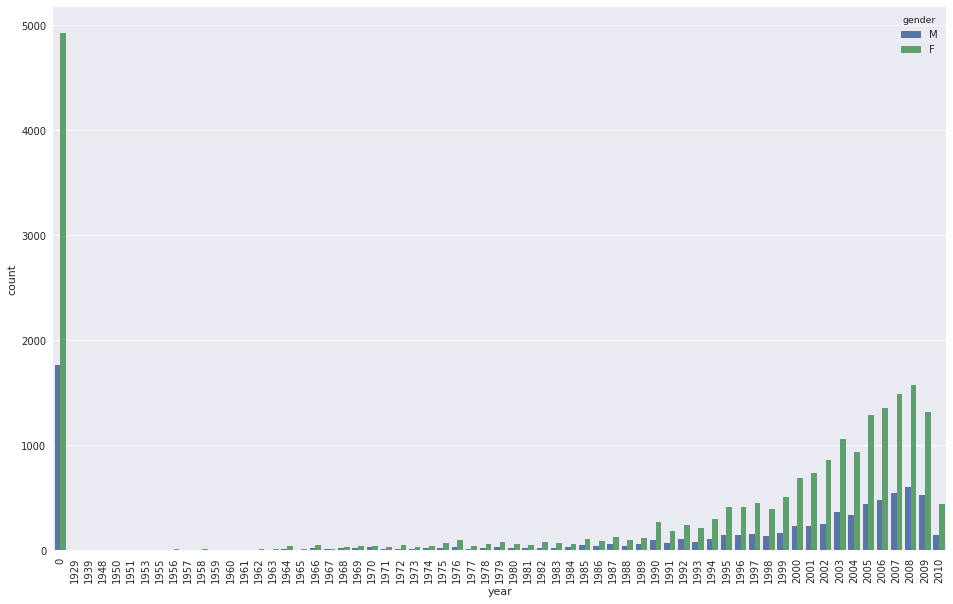

In [98]:
g=sns.countplot(data=pd, x="year", hue="gender")
g.set_xticklabels(g.get_xticklabels(), rotation=90);

In [4]:
cur.execute("""SELECT first_name, last_name, gender, name
FROM dimusers dm 
JOIN factsongplay sp ON (dm.user_id=sp.user_id) 
JOIN dimartists a ON (sp.artist_id=a.artist_id);""")

In [5]:
users_artists = cur.fetchall()

In [6]:
labels=["first_name", "last_name", "gender", "name"]

In [7]:
pd = pd.DataFrame.from_records(users_artists, columns=labels)

In [37]:
cnt_df = pd.groupby('name').size().nlargest()

## Example of a query : Top 5 artists listened by users

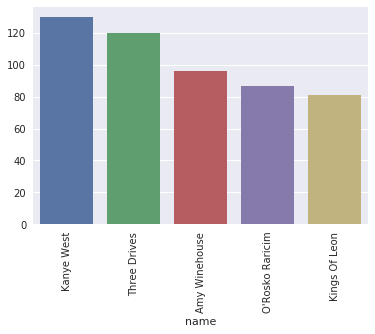

In [46]:
g = sns.barplot(cnt_df.index, cnt_df.values)
g.set_xticklabels(g.get_xticklabels(), rotation=90);

In [47]:
cur.close()
conn.close()